In [71]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


# Description of Project 
![https://camo.githubusercontent.com/45161b81ccf78648a3298a6de77f0cb4b519369f46e19e22a0cd32a3ba622fb0/68747470733a2f2f6d69726f2e6d656469756d2e636f6d2f6d61782f3837352f312a37626e4c4b73436858713934516a744169526e3430772e706e67](http://)

In This Project am going to use **supervised ML algorithm** to make **classification using Decision Tree algorithm.**
**Description of Dataset:**
The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.
Predicted attribute: class of iris plant.
**Attribute Information:**
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
-- Iris Setosa
-- Iris Versicolour
-- Iris Virginica


# **Importing Libraries**

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree

# Using Pandas for Data Manipulation


In [73]:
# Read iris data
df=pd.read_csv('../input/iris/Iris.csv') 
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [74]:
#The info() method prints information about the DataFrame. 
#The information contains the number of columns, column labels, 
#column data types, memory usage, range index,and the number of cells in each column (non-null values)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [75]:
# The describe() method returns statistical information about the data, its mean, standard 
# and standard deviation ...etc
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


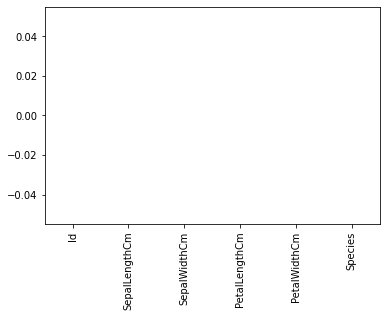

In [76]:
# isnull() method is checking if there's any missing value 
#df.isnull() 
df.isnull().sum().plot(kind='bar')
plt.show()
# I choose to plot the missing values

In [77]:
# Our target variable is "Species" we can see how many classes we have by visualizing 
# the species variable 
Species=df.Species.value_counts()
Species

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [78]:
# Converting the array of species into list 
listt=df.Species.unique().tolist()
listt

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

**** Visualizing how many speices we have****

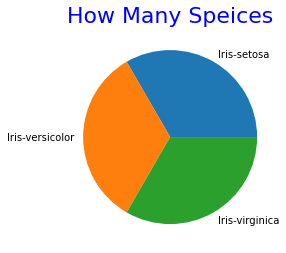

In [79]:
plt.pie(Species,labels=listt)
plt.title("How Many Speices",fontsize=22,color='blue')
plt.show()

**Figuring out all the relationships of all features between each other**

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


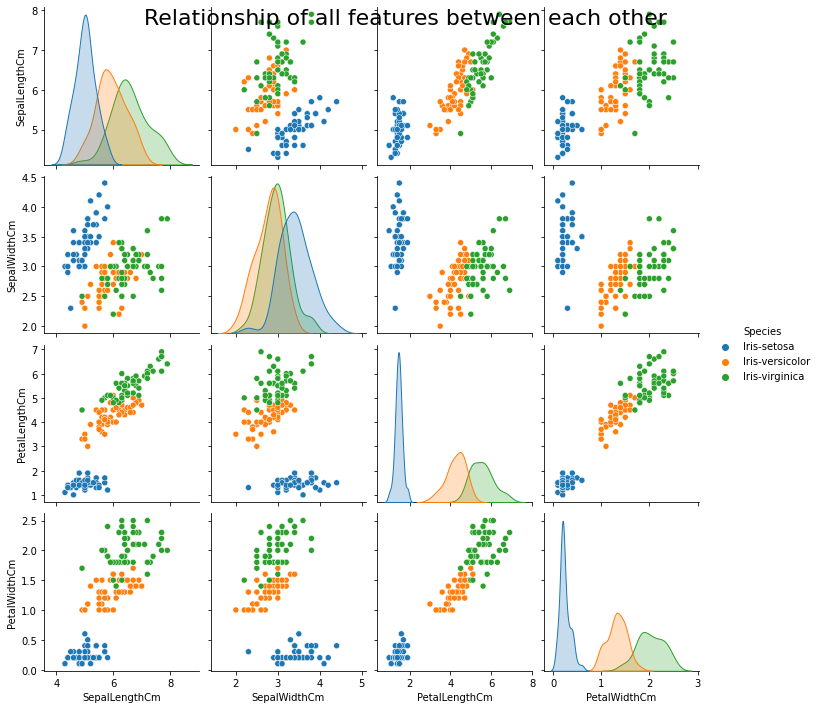

In [80]:
# Drop the id column 
data=df.drop('Id',axis=1)
plot=sns.pairplot(data, hue='Species', size=2.5)
plot.fig.suptitle("Relationship of all features between each other",fontsize=22)
plt.show()

# Applying the Decision Tree algorithm


In [81]:
features=df.drop(["Species","Id"],axis=1)
features

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [82]:
target=df["Species"]
target

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [83]:
model=tree.DecisionTreeClassifier()
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.3,random_state=1)
model=model.fit(features,target)
#tree.plot_tree(model)


# Visualizing the Graph of the Tree

In [84]:
features_names=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']


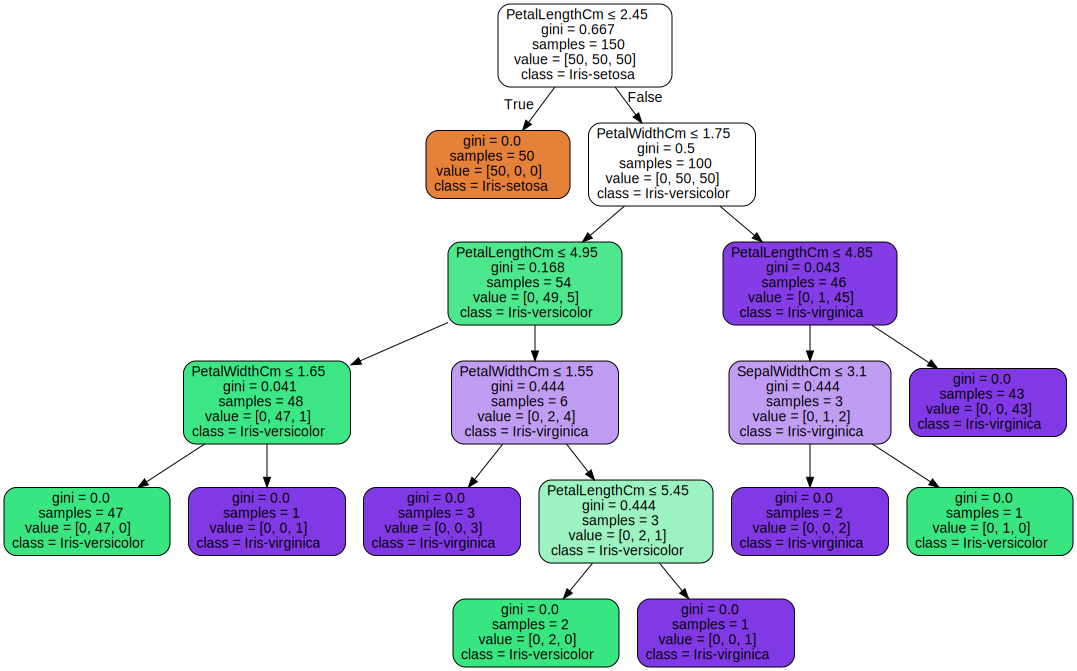

In [85]:
import graphviz
dot_data = tree.export_graphviz(model, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("df")
dot_data = tree.export_graphviz(model, out_file=None,feature_names=features_names,
                                class_names=listt,filled=True, rounded=True, 
                                special_characters=True)
graph = graphviz.Source(dot_data) 
graph 